In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from arch import arch_model

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('ETH-USD.csv',parse_dates=True, index_col='Date')

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-29,271.779053,273.756287,263.091400,269.455688,269.455688,9819132174
2019-05-30,269.551880,287.201630,247.348602,255.858948,255.858948,13604268584
2019-05-31,256.015259,268.659943,249.111847,268.113556,268.113556,11255023515
2019-06-01,268.433350,273.557983,263.524597,265.391266,265.391266,9942869852
2019-06-02,265.512726,272.807220,265.041870,270.225525,270.225525,8744111713


In [4]:
df['LogRet'] = np.log(df['Close']).diff()

In [5]:
df2 = df.iloc[1:].copy()

<Axes: xlabel='Date'>

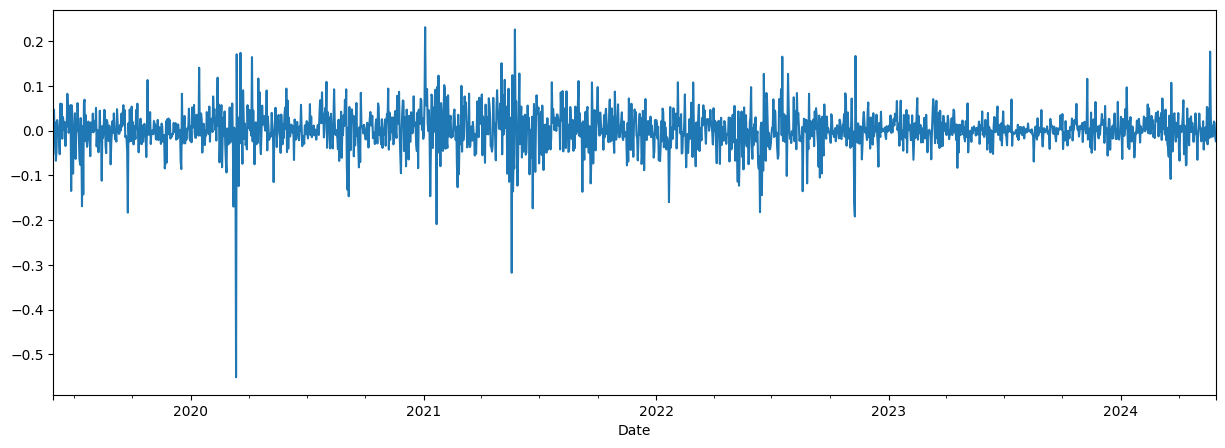

In [6]:
df2['LogRet'].plot(figsize=(15,5))

In [7]:
df2['Ysq'] = df['LogRet'] ** 2

<Axes: xlabel='Date'>

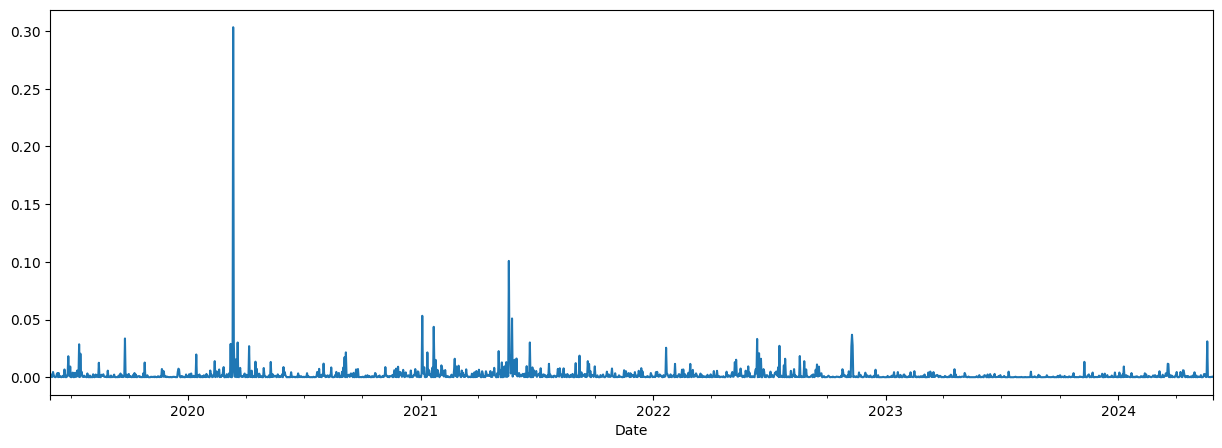

In [8]:
df2['Ysq'].plot(figsize=(15,5))

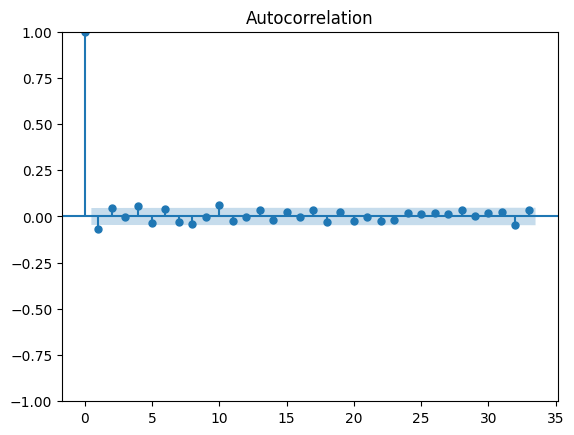

In [9]:
plot_acf(df2['LogRet']);

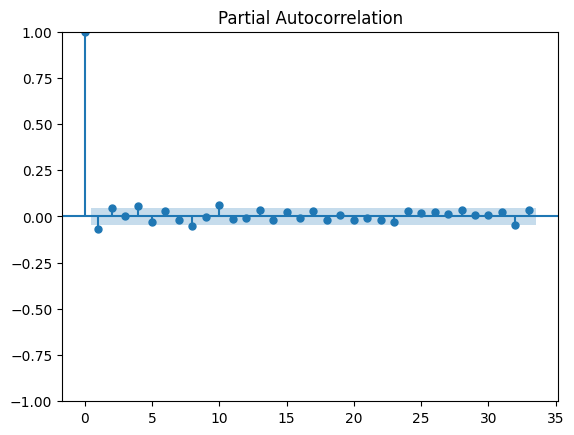

In [10]:
plot_pacf(df2['LogRet']);

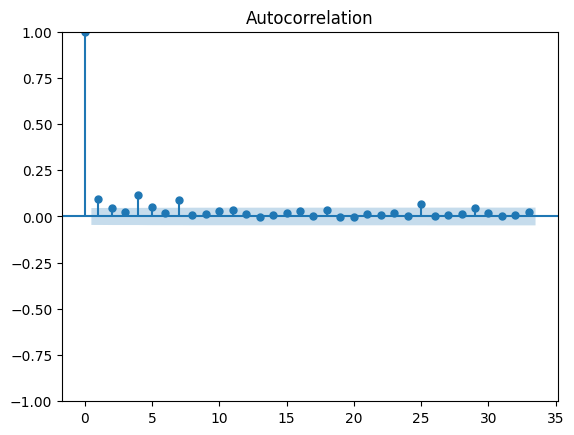

In [11]:
plot_acf(df2['Ysq']);

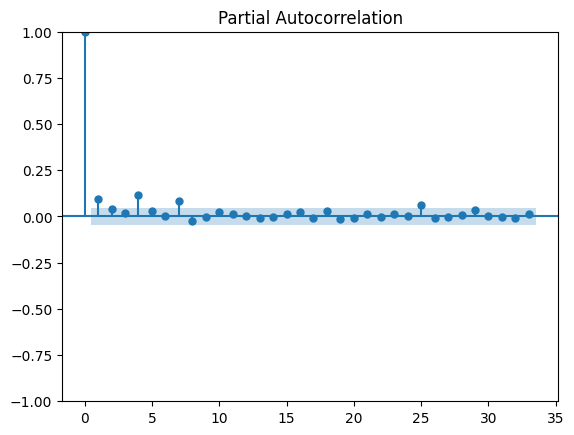

In [12]:
plot_pacf(df2['Ysq']);

It is not about squaring cause then squared noise would have autocorrelation.

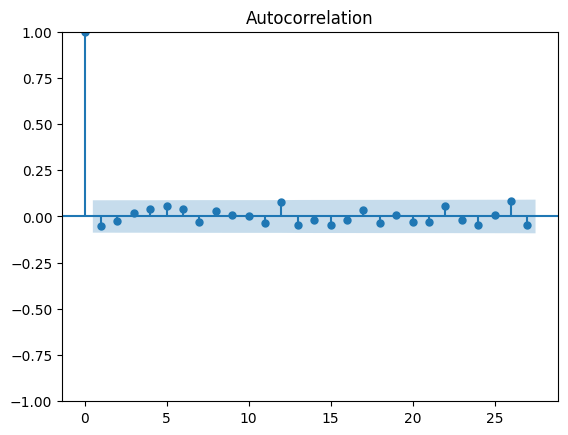

In [13]:
noise_sq = np.random.randn(500)**2
plot_acf(noise_sq);

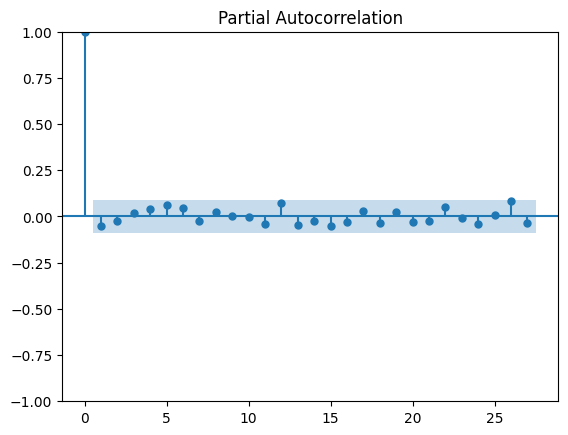

In [14]:
plot_pacf(noise_sq);

In [15]:
Ntest = 500
train = df2.iloc[:-Ntest][['LogRet']].copy()
test = df2.iloc[-Ntest:][['LogRet']].copy()

In [16]:
model = arch_model(train['LogRet'], vol='GARCH', p=1, q=1)

In [17]:
res = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 93398274.95592566
Iteration:      2,   Func. Count:     16,   Neg. LLF: -2172.000250689979
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2172.0002507178287
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2


C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002467. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [19]:
m = train['LogRet'].mean()
s = train['LogRet'].std()
train['Scaled'] = (train['LogRet'] - m)/s
test['Scaled'] = (test['LogRet'] - m)/s
df2['Scaled'] = (df2['LogRet'] - m)/s

In [20]:
arch1 = arch_model(train['Scaled'], vol='ARCH', p=1)

In [21]:
res_arch1 = arch1.fit(update_freq=10)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1873.3315616510565
            Iterations: 8
            Function evaluations: 39
            Gradient evaluations: 8


In [22]:
res_arch1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1873.33
Distribution:                  Normal   AIC:                           3752.66
Method:            Maximum Likelihood   BIC:                           3768.24
                                        No. Observations:                 1327
Date:                Fri, Aug 02 2024   Df Residuals:                     1326
Time:                        12:01:55   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.1585e-03  2.720e-02      0.153      0.878 [-4.915e-02,5.747e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.9301      0.122      7.593  3.121e-14    [  0.690,  1.170]
alpha[1]       0.0673  4.051e-02      1.660  9.689e-02 [-1.215e-02,  0.147]
===========================================================================

Covariance estimator: robust
"""

<Axes: xlabel='Date'>

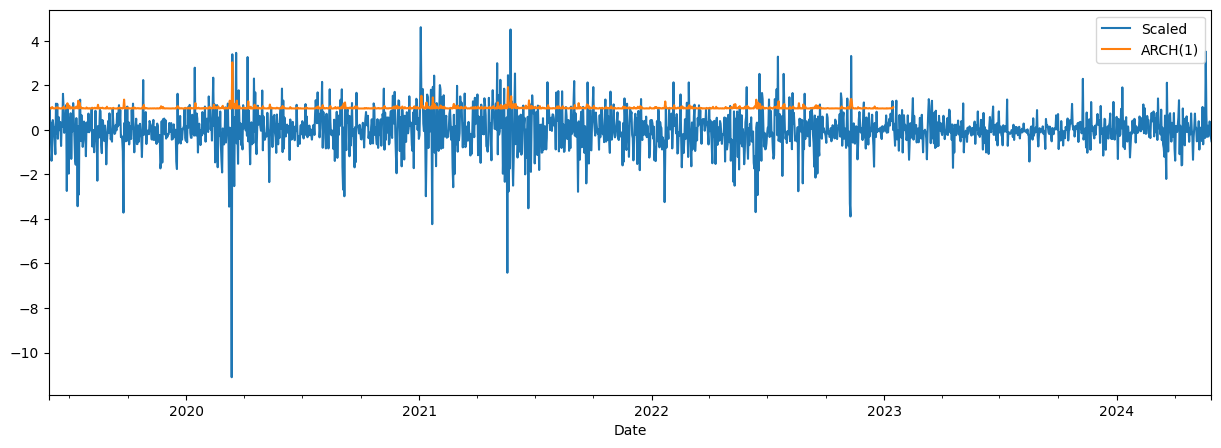

In [23]:
df2['ARCH(1)'] = res_arch1.conditional_volatility
df2[['Scaled', 'ARCH(1)']].plot(figsize=(15,5))

In [24]:
res_arch1.forecast(horizon=Ntest, reindex=True)

In [25]:
fcast_arch1 = res_arch1.forecast(horizon=Ntest, reindex=True)

In [26]:
fcast_arch1

In [27]:
fcast_arch1.mean

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
fcast_arch1.variance.tail

<bound method NDFrame.tail of                h.001     h.002     h.003     h.004     h.005     h.006  \
Date                                                                     
2019-05-30       NaN       NaN       NaN       NaN       NaN       NaN   
2019-05-31       NaN       NaN       NaN       NaN       NaN       NaN   
2019-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
2019-06-02       NaN       NaN       NaN       NaN       NaN       NaN   
2019-06-03       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2023-01-11       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-12       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-13       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-14       NaN       NaN       NaN       NaN       NaN       NaN   
2023-01-15  0.930127  0.992675  0.996881  0.997164  0.997183  0.997184   

       

In [31]:
fcast_arch1 = res_arch1.forecast(horizon=Ntest, reindex=False)

In [32]:
fcast_arch1.mean

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-15,0.004158,0.004158,0.004158,0.004158,0.004158,0.004158,0.004158,0.004158,0.004158,0.004158,...,0.004158,0.004158,0.004158,0.004158,0.004158,0.004158,0.004158,0.004158,0.004158,0.004158


In [33]:
fcast_arch1.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-15,0.930127,0.992675,0.996881,0.997164,0.997183,0.997184,0.997184,0.997184,0.997184,0.997184,...,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184


<Axes: xlabel='Date'>

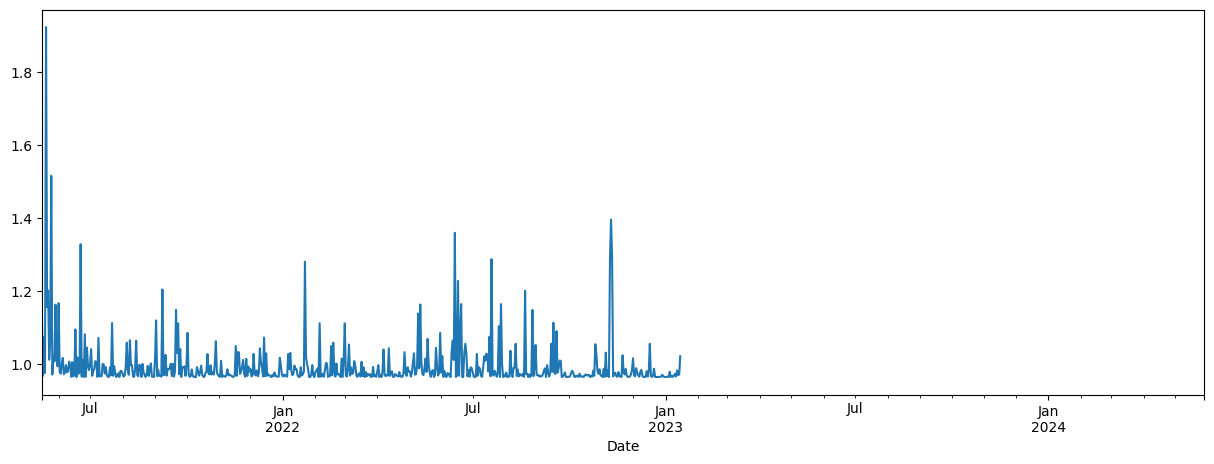

In [44]:
date1 = '2021-05-16'
df2.loc[date1:]['ARCH(1)'].plot(figsize=(15,5))

In [52]:
date2 = '2021-05-05'
date2_6m_after = '2021-11-05'
fcast_arch1 = res_arch1.forecast(horizon=Ntest, reindex=True, start=date2)

In [53]:
date2_prev =  '2021-05-01'
date2_post =  '2021-05-10'
fcast_arch1.variance[date2_prev:date2_post]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-05,1.095657,1.003807,0.997630,0.997214,0.997186,0.997185,0.997184,0.997184,0.997184,0.997184,...,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184
2021-05-06,0.933197,0.992881,0.996895,0.997165,0.997183,0.997184,0.997184,0.997184,0.997184,0.997184,...,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184
2021-05-07,0.930418,0.992694,0.996882,0.997164,0.997183,0.997184,0.997184,0.997184,0.997184,0.997184,...,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184
2021-05-08,1.270232,1.015547,0.998419,0.997267,0.997190,0.997185,0.997184,0.997184,0.997184,0.997184,...,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184
2021-05-09,0.930849,0.992723,0.996884,0.997164,0.997183,0.997184,0.997184,0.997184,0.997184,0.997184,...,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184,0.997184


In [54]:
fcast_arch1.variance.loc[date1].to_numpy().shape

(500,)

In [55]:
date1_index = df2.index.get_loc(date1)
df2.index.get_loc(date1)

717

In [56]:
df2.index[date1_index + 500]

Timestamp('2022-09-28 00:00:00')

In [57]:
d3_start = '2021-05-17'
d3_stop = '2022-09-28'
df2.loc[d3_start:d3_stop, 'ARCH(1) Forecast'] = np.sqrt(fcast_arch1.variance.loc[date1].to_numpy())

<Axes: xlabel='Date'>

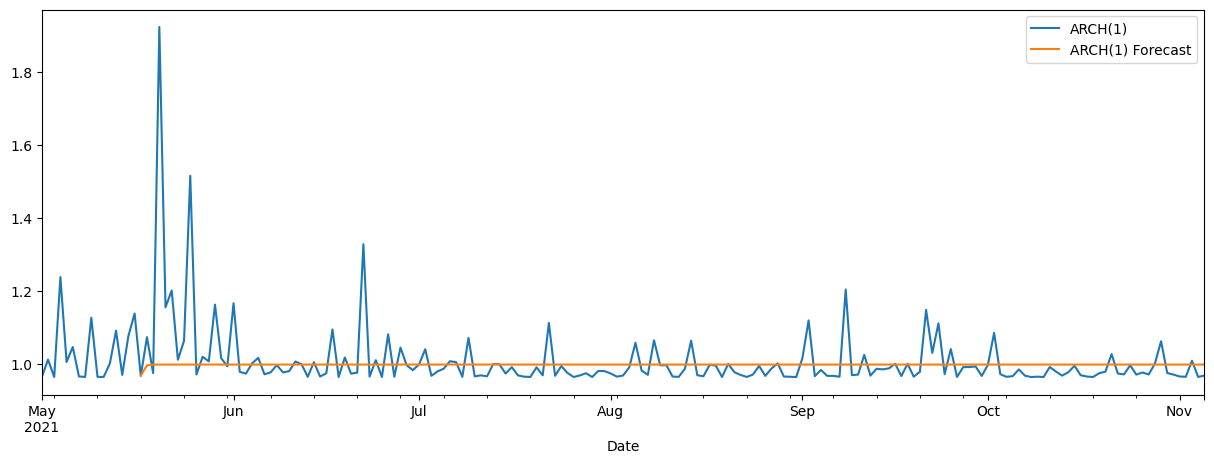

In [58]:
df2.loc[date2_prev:date2_6m_after][['ARCH(1)','ARCH(1) Forecast']].plot(figsize=(15,5))

In [60]:
fcast_arch1.variance.index.get_loc('2021-05-25')

726

In [62]:
df2.index[726+500]

Timestamp('2022-10-07 00:00:00')

In [65]:
df2.loc['2021-05-26':'2022-10-07','ARCH(1) Forecast Low'] = np.sqrt(fcast_arch1.variance.loc['2021-05-25'].to_numpy())

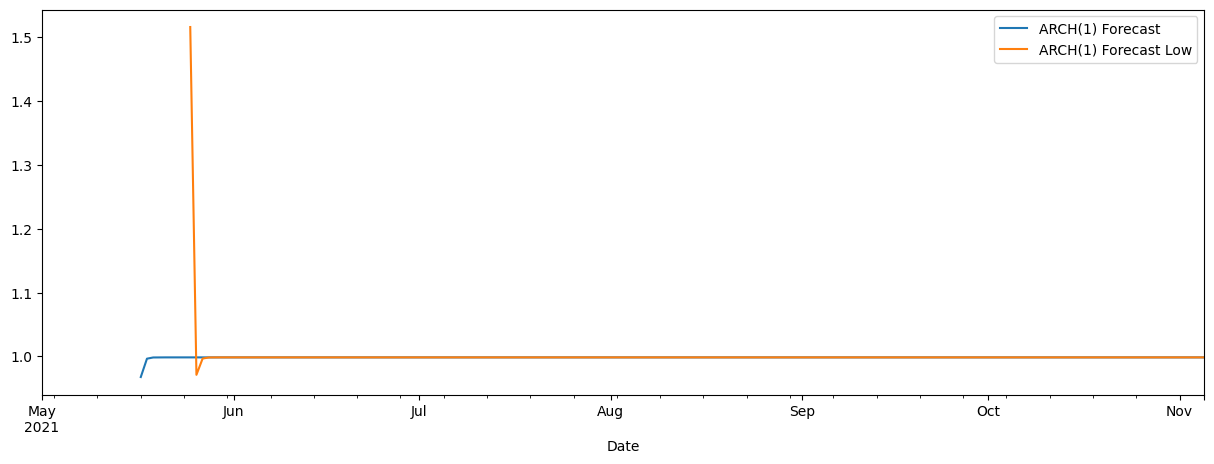

In [66]:
plot_cols = ['ARCH(1) Forecast', 'ARCH(1) Forecast Low']

In [68]:
df2.loc[date2_prev:date2_6m_after][plot_cols].plot(figsize=(15, 5));
res_arch1.params

mu          0.004158
omega       0.930123
alpha[1]    0.067251
Name: params, dtype: float64

In [69]:
res_arch1.params['omega']/(1-res_arch1.params['alpha[1]'])

0.9971844398041927

In [70]:
fcast_arch1.variance.loc[date1].to_numpy()[-1]

0.9971844398041927

## GARCH(1,1)

In [71]:
garch11 = arch_model(train['Scaled'], vol='GARCH',p=1,q=1)

In [72]:
res_garch11 = garch11.fit(update_freq=10)

Iteration:     10,   Func. Count:     62,   Neg. LLF: 1807.438670592986
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1807.4386705946665
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


In [73]:
res_garch11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1807.44
Distribution:                  Normal   AIC:                           3622.88
Method:            Maximum Likelihood   BIC:                           3643.64
                                        No. Observations:                 1327
Date:                Fri, Aug 02 2024   Df Residuals:                     1326
Time:                        12:39:08   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0191  2.505e-02      0.762      0.446 [-3.001e-02,6.819e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0649  3.398e-02      1.910  5.610e-02 [-1.689e-03,  0.132]
alpha[1]       0.1370  6.085e-02      2.252  2.431e-02  [1.778e-02,  0.256]
beta[1]        0.8119  5.896e-02     13.771  3.833e-43    [  0.696,  0.927]
===========================================================================

Covariance estimator: robust
"""

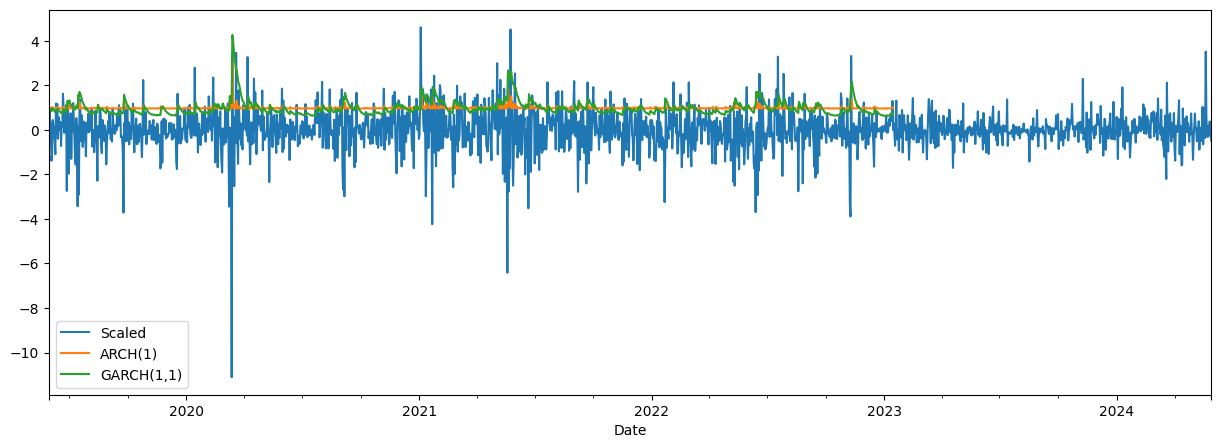

In [75]:
df2['GARCH(1,1)'] = res_garch11.conditional_volatility
df2[['Scaled', 'ARCH(1)', 'GARCH(1,1)']].plot(figsize=(15,5));

In [76]:
fcast_garch11 = res_garch11.forecast(horizon=Ntest, reindex=False, start=date1)

In [77]:
date1

'2021-05-16'

In [82]:
df2.loc['2021-05-17':'2022-09-28', 'GARCH(1,1) Forecast'] = np.sqrt(fcast_garch11.residual_variance.loc[date1].to_numpy())

<Axes: xlabel='Date'>

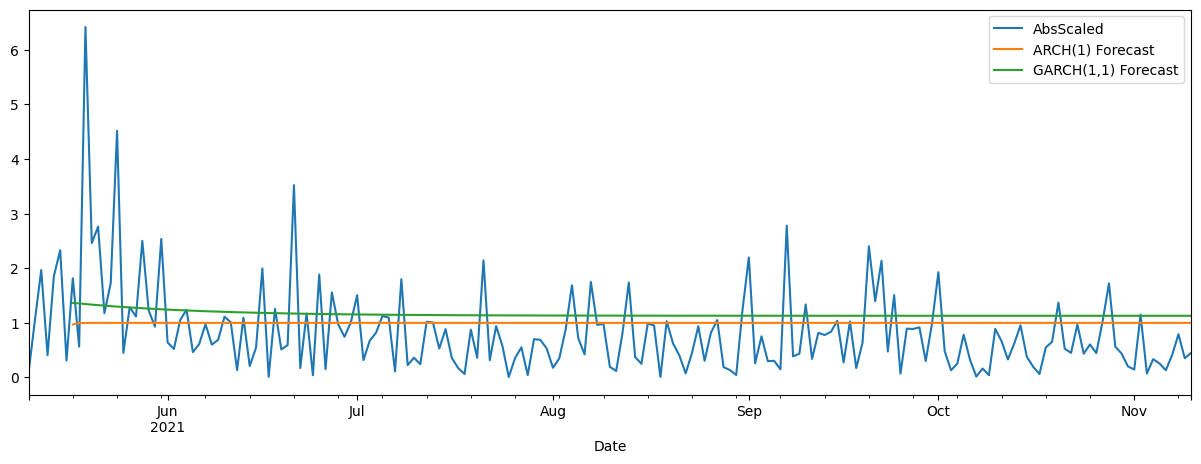

In [85]:
df2['AbsScaled'] = df2['Scaled'].abs()
plot_cols = ['AbsScaled','ARCH(1) Forecast', 'GARCH(1,1) Forecast']
df2.loc['2021-05-10':'2021-11-10'][plot_cols].plot(figsize=(15,5))

## t-Distribution

In [86]:
garch11t = arch_model(train['Scaled'], vol='GARCH', p=1, q=1, dist='studentst')

In [87]:
res_garch11t = garch11t.fit(update_freq=10)

Iteration:     10,   Func. Count:     74,   Neg. LLF: 1698.3557473835212
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1698.3555265076288
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13


In [88]:
res_garch11t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Scaled   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1698.36
Distribution:      Standardized Student's t   AIC:                           3406.71
Method:                  Maximum Likelihood   BIC:                           3432.66
                                              No. Observations:                 1327
Date:                      Fri, Aug 02 2024   Df Residuals:                     1326
Time:                              12:53:57   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0230  2.001e-02      1.147      0.252 [-1.628e-02,6.218e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0806  3.410e-02      2.365  1.804e-02 [1.380e-02,  0.147]
alpha[1]       0.1169  3.696e-02      3.162  1.566e-03 [4.443e-02,  0.189]
beta[1]        0.8134  5.490e-02     14.818  1.119e-49   [  0.706,  0.921]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.7923      0.413      9.190  3.922e-20 [  2.984,  4.601]
========================================================================

Covariance estimator: robust
"""

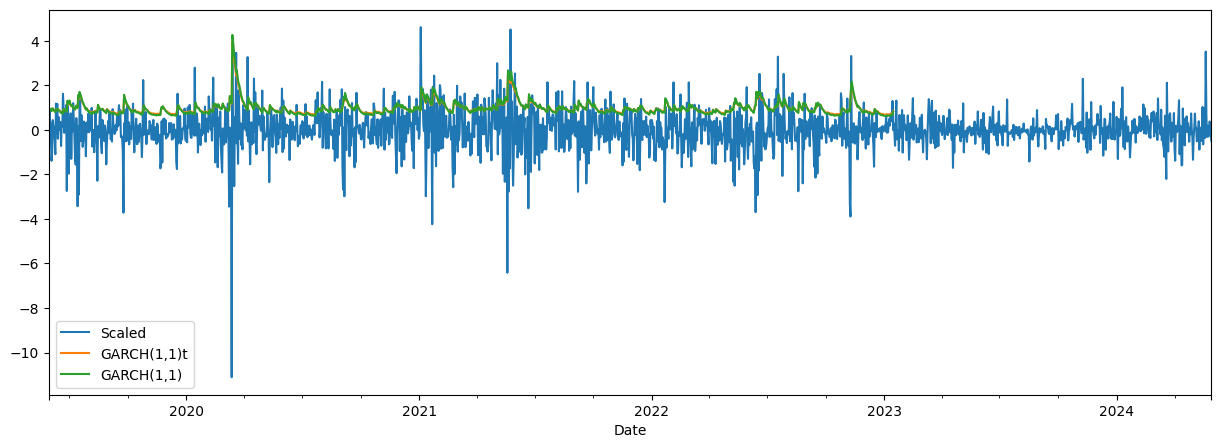

In [89]:
df2['GARCH(1,1)t'] = res_garch11t.conditional_volatility
df2[['Scaled', 'GARCH(1,1)t', 'GARCH(1,1)']].plot(figsize=(15, 5));

In [90]:
fcast_garch11t = res_garch11t.forecast(horizon=Ntest, reindex=False, start=date1)

In [91]:
date1

'2021-05-16'

In [93]:
df2.loc['2021-05-17':'2022-09-28', 'GARCH(1,1)t Forecast'] = np.sqrt(fcast_garch11t.residual_variance.loc[date1].to_numpy())

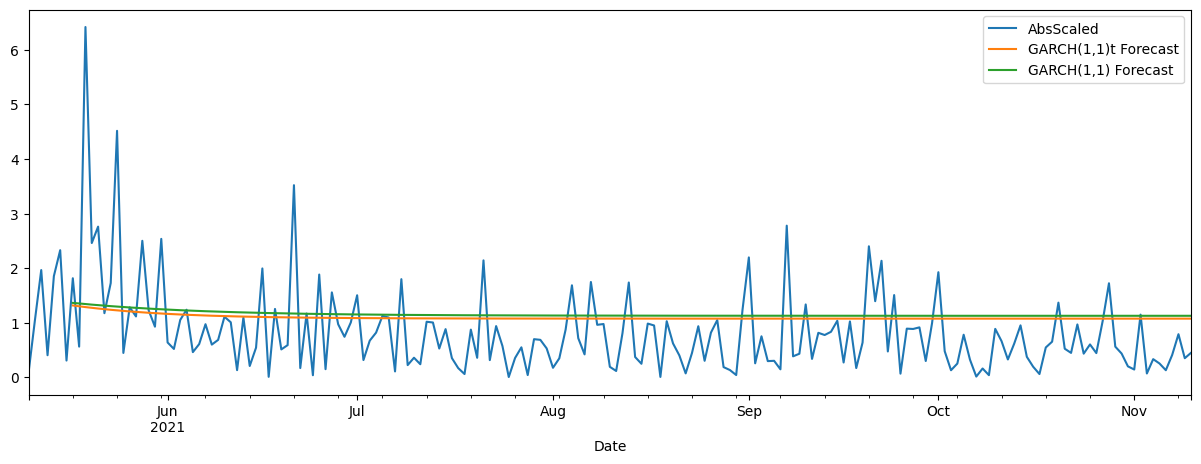

In [94]:
plot_cols = ['AbsScaled', 'GARCH(1,1)t Forecast', 'GARCH(1,1) Forecast']
df2.loc['2021-05-10':'2021-11-10'][plot_cols].plot(figsize=(15, 5));

## GARCH(p,q)

In [95]:
garchpq = arch_model(train['Scaled'], p=8, q=5, dist='studentst')

In [96]:
res_garchpq = garchpq.fit(update_freq=10)

Iteration:     10,   Func. Count:    185,   Neg. LLF: 1721.5111595297528
Iteration:     20,   Func. Count:    359,   Neg. LLF: 1692.866566708844
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1692.866566708844
            Iterations: 21
            Function evaluations: 375
            Gradient evaluations: 21


In [97]:
res_garchpq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Scaled   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1692.87
Distribution:      Standardized Student's t   AIC:                           3417.73
Method:                  Maximum Likelihood   BIC:                           3500.78
                                              No. Observations:                 1327
Date:                      Fri, Aug 02 2024   Df Residuals:                     1326
Time:                              12:57:00   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0238  2.736e-02      0.871      0.384 [-2.979e-02,7.744e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3604      0.236      1.525      0.127    [ -0.103,  0.823]
alpha[1]       0.0713  3.747e-02      1.902  5.723e-02 [-2.188e-03,  0.145]
alpha[2]       0.1278      0.157      0.813      0.416    [ -0.180,  0.436]
alpha[3]       0.0912      0.244      0.374      0.709    [ -0.387,  0.570]
alpha[4]       0.0443      0.119      0.372      0.710    [ -0.189,  0.277]
alpha[5]   7.8414e-14      0.428  1.831e-13      1.000    [ -0.840,  0.840]
alpha[6]       0.0000      0.419      0.000      1.000    [ -0.822,  0.822]
alpha[7]       0.1476      0.180      0.822      0.411    [ -0.205,  0.500]
alpha[8]   7.6306e-12      0.716  1.066e-11      1.000    [ -1.403,  1.403]
beta[1]        0.0000      1.917      0.000      1.000    [ -3.758,  3.758]
beta[2]        0.0000      1.675      0.000      1.000    [ -3.283,  3.283]
beta[3]        0.0626      0.777  8.054e-02      0.936    [ -1.461,  1.586]
beta[4]        0.1457      0.303      0.481      0.631    [ -0.449,  0.740]
beta[5]        0.0000      1.011      0.000      1.000    [ -1.981,  1.981]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.8278      1.214      3.154  1.610e-03 [  1.449,  6.206]
========================================================================

Covariance estimator: robust
"""

In [98]:
res_arch1.aic, res_garch11.aic, res_garch11t.aic, res_garchpq.aic

(3752.663123302113, 3622.877341189333, 3406.7110530152577, 3417.733133417688)

<Axes: xlabel='Date'>

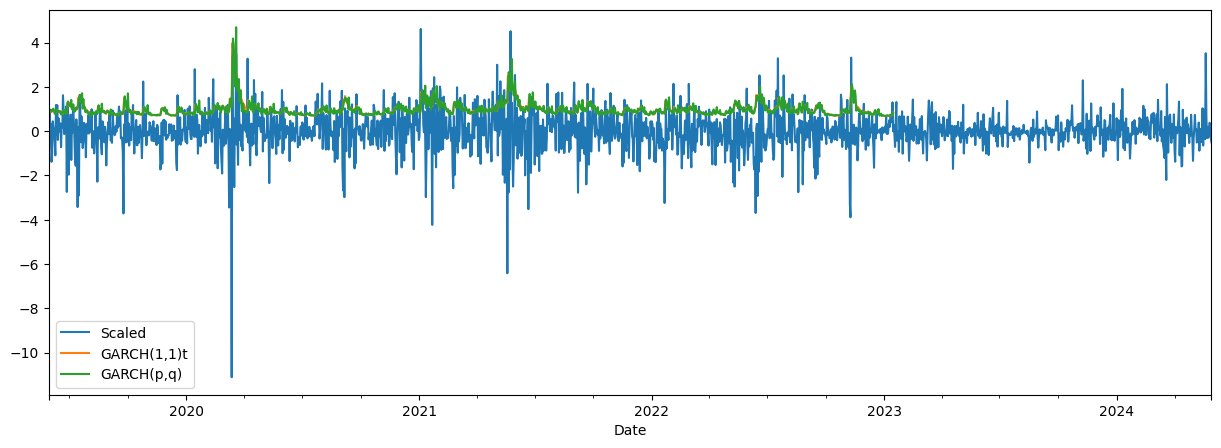

In [99]:
df2['GARCH(p,q)'] = res_garchpq.conditional_volatility
df2[['Scaled', 'GARCH(1,1)t', 'GARCH(p,q)']].plot(figsize=(15, 5))

In [100]:
fcast_garchpq = res_garchpq.forecast(
    horizon=Ntest, reindex=False, start=date1)

In [101]:
date1

'2021-05-16'

In [102]:
df2.loc['2021-05-17':'2022-09-28', 'GARCH(p,q) Forecast'] = np.sqrt(
    fcast_garch11t.variance.loc[date1].to_numpy())

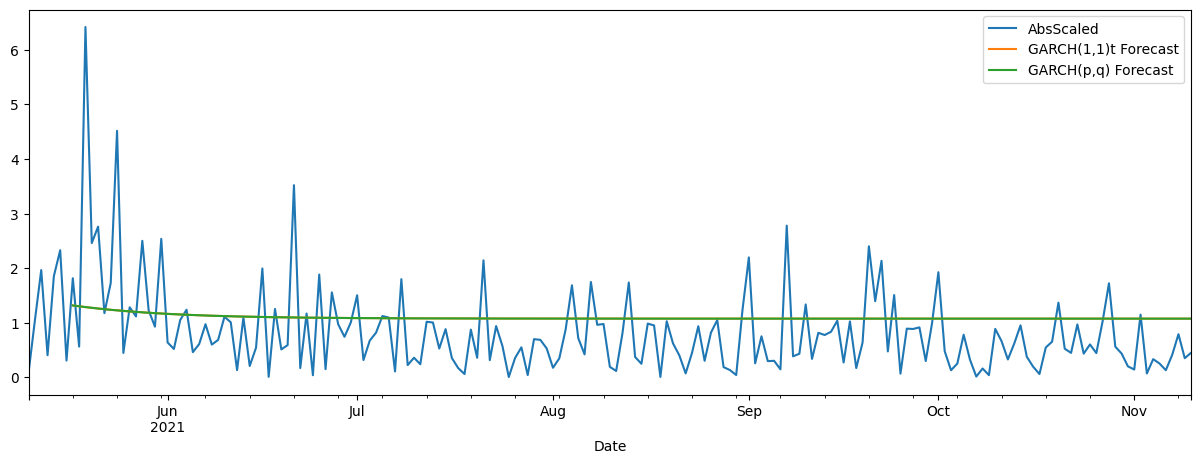

In [103]:
plot_cols = ['AbsScaled', 'GARCH(1,1)t Forecast', 'GARCH(p,q) Forecast']
df2.loc['2021-05-10':'2021-11-10'][plot_cols].plot(figsize=(15, 5));

In [104]:
train_idx = df2.index <= train.index[-1]
test_idx = ~train_idx

In [105]:
df2.loc[train_idx, 'GARCH(p,q) Train'] = res_garchpq.conditional_volatility
df2.loc[test_idx, 'GARCH(p,q) Test'] = np.sqrt(
    fcast_garchpq.variance.iloc[-1].to_numpy())

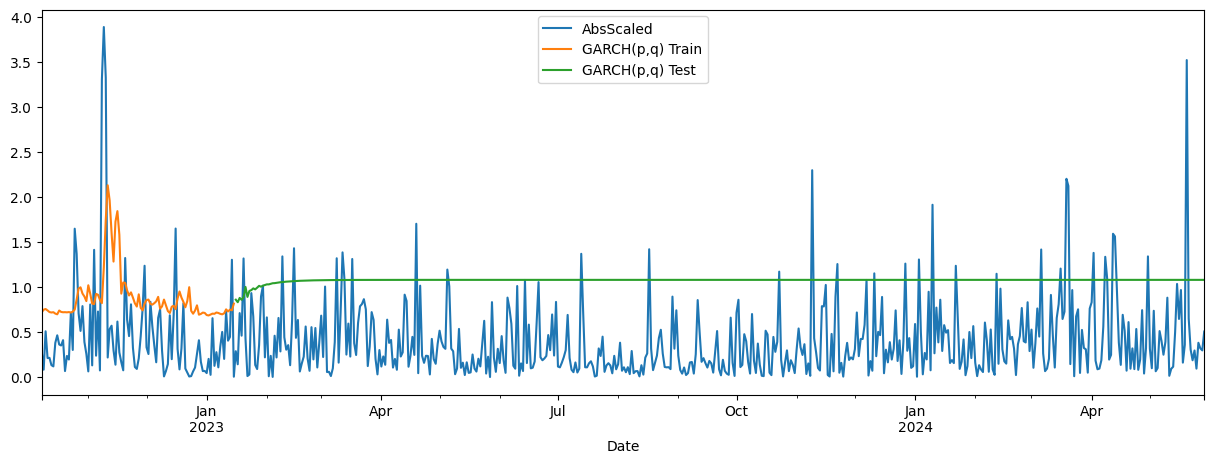

In [106]:
plot_cols = ['AbsScaled', 'GARCH(p,q) Train', 'GARCH(p,q) Test']
df2.iloc[-(Ntest+100):][plot_cols].plot(figsize=(15, 5));